### Does a parent level of education affect their children's grades?

### GOAL :
- Project proposal:
In this project, the task is to get a dataset to analysis and build a classification model on. I choose to analysis a data set of Student Performance In Exams to determine if the student will pass the exam with the relationship of the parent level of education. My target will be (Grades), as a result, the type of model I will build is multiple classification models. The dataset will be obtained from the [Kaggle](https://www.kaggle.com/syamkakarla/student-performance-in-exams-eda) and will consist of 1000 rows and 8 columns in total and after analysis, data is 15 columns 

* Inferences would be :
1. How to imporve the students performance in each test ?
2. Does a parent level of education affect their children's grades?

3. Other inferences

### Import 

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,confusion_matrix
from sklearn.ensemble import VotingClassifier


In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [3]:
len(df)

1000

<AxesSubplot:>

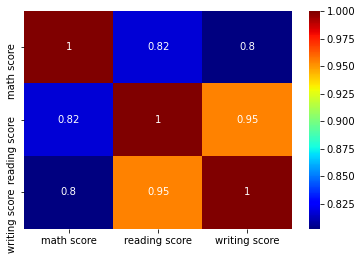

In [3]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='jet')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.shape

(1000, 8)

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.columns=[col.strip() for col in df.columns]
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:xlabel='math score', ylabel='Density'>

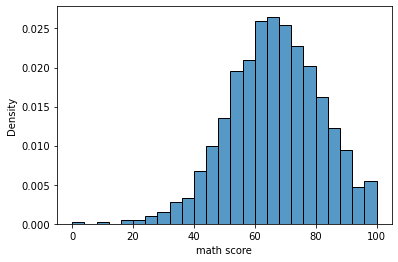

In [9]:
sns.histplot(df['math score'],kde=False,stat='density')


In [10]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
df['lunch']

0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length: 1000, dtype: object

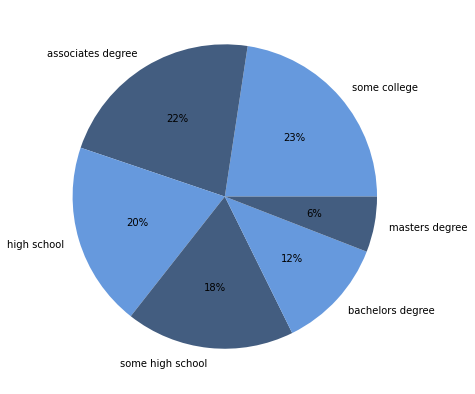

In [12]:

plt.figure(figsize=[7,7])
eduction=list(df['parental level of education'].value_counts())
labels=['some college','associates degree','high school','some high school','bachelors degree','masters degree']
color=['#6699DD','#435D80']
plt.pie(eduction,labels=labels,autopct='%.0f%%',colors=color);


#### - Math Score with parental level of education

 - I will set the minimum marks to 60 to pass in a exam

In [13]:
passmark=60
df['math_status']=np.where(df['math score']<passmark,'F','P')
df.math_status.value_counts()

P    677
F    323
Name: math_status, dtype: int64

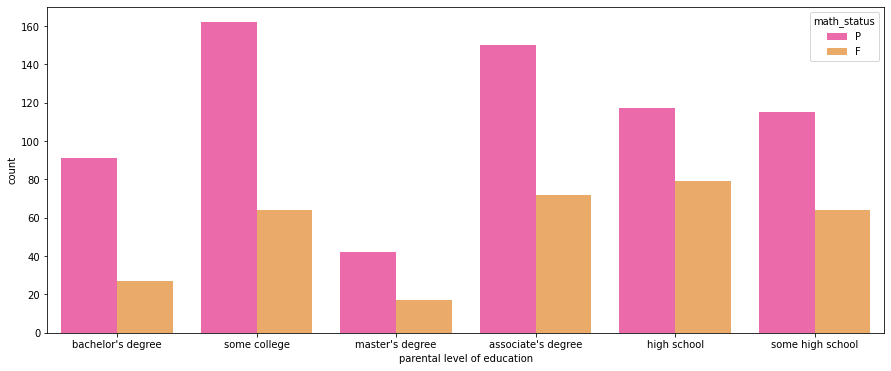

In [14]:
plt.figure(figsize=[15, 6])
parent=sns.countplot(x='parental level of education',data=df, hue='math_status', palette="spring")


#### - Reading Score with parental level of education

In [23]:
df['read_stat']=np.where(df['reading score']< passmark,'F','P')
df['read_stat'].value_counts()

P    746
F    254
Name: read_stat, dtype: int64

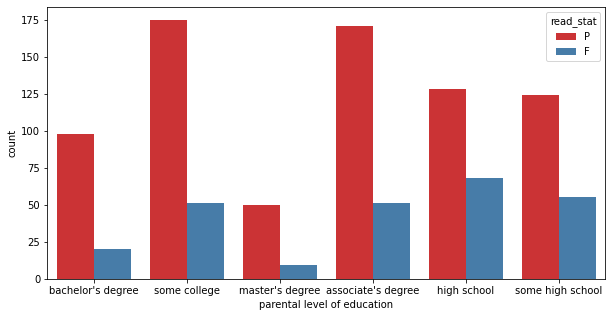

In [24]:
plt.figure(figsize=[10, 5])
parent=sns.countplot(x='parental level of education',data=df, hue='read_stat', palette="Set1")

#### - Writeing Score with Parental level of education

In [25]:
df['write_stat']=np.where(df['writing score']< passmark,'F','P')
df['write_stat'].value_counts()

P    719
F    281
Name: write_stat, dtype: int64

<Figure size 720x432 with 0 Axes>

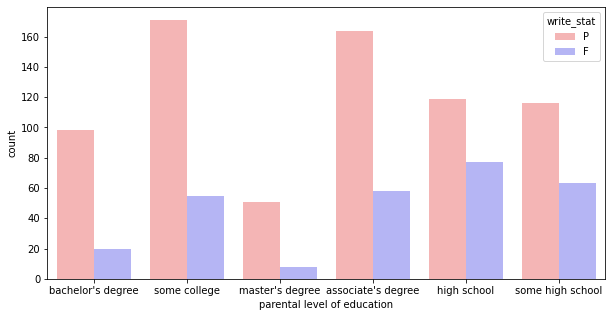

In [26]:
plt.figure(figsize=[10,6])
plt.figure(figsize=[10, 5])
parent=sns.countplot(x='parental level of education',data=df, hue=('write_stat'), palette = 'bwr_r');

In [27]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_status,read_stat,OverAll,write_stat
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P


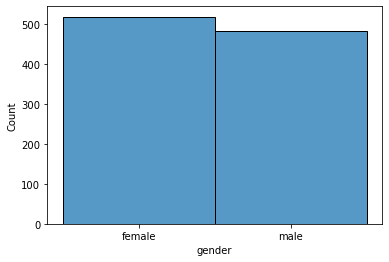

In [28]:
sns.histplot(df['gender']);

In [29]:
df['test preparation course']

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object

In [30]:
df['TotalMarks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['TotalMarks']/3

In [31]:
df['OverAll']=df.apply(lambda x: 'F' if x['math_status']=='F' or x['read_stat']=='F'or ['write_stat']=='F' else 'P',axis=1)
df['OverAll'].value_counts()

P    628
F    372
Name: OverAll, dtype: int64

In [32]:
def GetGrade(Percentage, OverAll):
    if ( OverAll == 'F'):
        return 'F'    
    if ( Percentage >= 90 ):
        return 'A'
    if ( Percentage >= 80):
        return 'B'
    if ( Percentage >= 70):
        return 'C'
    if ( Percentage >= 60):
        return 'D'
    if ( Percentage >= 50):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll']), axis=1)
df['Grade'].value_counts()

F    372
C    254
D    172
B    146
A     52
E      4
Name: Grade, dtype: int64

In [33]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_status,read_stat,OverAll,write_stat,TotalMarks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,B


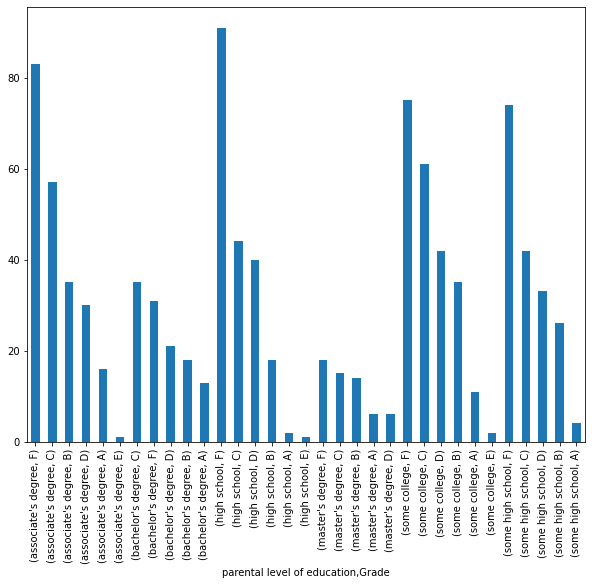

In [34]:
plt.figure(figsize=[10,8])
df.groupby('parental level of education')['Grade'].value_counts().plot(kind='bar',colormap="tab10");

### Convert to dummyeis

In [35]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_status,read_stat,OverAll,write_stat,TotalMarks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,C


In [36]:
data=pd.get_dummies(df,columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course','OverAll','math_status','read_stat','write_stat'])
data.head()

,math score,reading score,writing score,TotalMarks,Percentage,Grade,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,...,test preparation course_completed,test preparation course_none,OverAll_F,OverAll_P,math_status_F,math_status_P,read_stat_F,read_stat_P,write_stat_F,write_stat_P
0,72,72,74,218,72.666667,C,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
1,69,90,88,247,82.333333,B,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1
2,90,95,93,278,92.666667,A,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3,47,57,44,148,49.333333,F,0,1,1,0,...,0,1,1,0,1,0,1,0,1,0
4,76,78,75,229,76.333333,C,0,1,0,0,...,0,1,0,1,0,1,0,1,0,1


In [37]:
data.dtypes

math score                                          int64
reading score                                       int64
writing score                                       int64
TotalMarks                                          int64
Percentage                                        float64
Grade                                              object
gender_female                                       uint8
gender_male                                         uint8
race/ethnicity_group A                              uint8
race/ethnicity_group B                              uint8
race/ethnicity_group C                              uint8
race/ethnicity_group D                              uint8
race/ethnicity_group E                              uint8
parental level of education_associate's degree      uint8
parental level of education_bachelor's degree       uint8
parental level of education_high school             uint8
parental level of education_master's degree         uint8
parental level

### Split Data

In [ ]:
X=data.drop(columns=['Grade'],axis=1)
y=data['Grade']
X_train,y_train,X_val,y_val=train_test_split(X,y,test_size=.35,random_states=42)
X_test,y_test,X_train,y_train=train_test_split(X,y,test_size=.30)

model=LogicticRegrisstion()

In [38]:
X=data.drop(columns=['Grade'],axis=1)
y=data['Grade']

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.35,random_state=42)
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=.30,random_state=42)

In [35]:
c=Counter(y)
for k,v in c.items():
    dist=v /len(y)*100
    print(f"class {k}, n={v} ({dist}%)")

class C, n=254 (25.4%)
class B, n=146 (14.6%)
class A, n=52 (5.2%)
class F, n=372 (37.2%)
class D, n=172 (17.2%)
class E, n=4 (0.4%)


<BarContainer object of 6 artists>

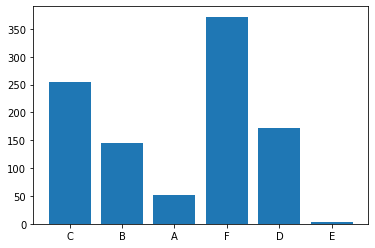

In [41]:
plt.bar(c.keys(),c.values())

## Model

- Baseline 

In [57]:
model=DecisionTreeClassifier()
scores_train=cross_validate(model,X_train,y_train,cv=4,n_jobs=-1,scoring='f1_macro')
# scores_val=cross_validate(model,X_val,y_train,cv=4,n_jobs=-1,scoring='f1_macro')p
print(f'score of traing: ',scores_train)


score of traing:  {'fit_time': array([0.00538993, 0.00514603, 0.00469542, 0.00755548]), 'score_time': array([0.00460887, 0.0045414 , 0.00445533, 0.00503922]), 'test_score': array([1.        , 0.97047619, 1.        , 1.        ])}


###  SMOTE 

In [109]:
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X_train, y_train)

In [110]:
c=Counter(y)
for k,v in c.items():
    dist=v /len(y)*100
    print(f"class {k}, n={v} ({dist}%)")

class B, n=118 (20.0%)
class F, n=118 (20.0%)
class C, n=118 (20.0%)
class D, n=118 (20.0%)
class A, n=118 (20.0%)


<BarContainer object of 5 artists>

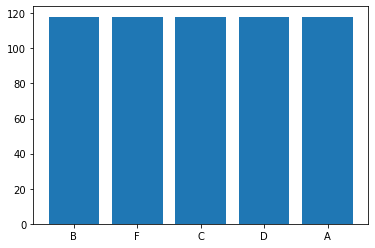

In [111]:
plt.bar(c.keys(),c.values())

#### Metrics 

In [134]:
def print_all_metrics(y, y_pred):
    print(f'Accuracy:\t\t{accuracy_score(y, y_pred)}')
    print(f'F1 Score:\t\t{f1_score(y, y_pred, average="weighted")}')
    print(f'Recall :\t\t{recall_score(y, y_pred, average="weighted") }')
    print(f'Precision :\t\t{precision_score(y, y_pred, average="weighted")}')


#### Logistic Regression:


In [164]:
log_reg = LogisticRegression(C=10, max_iter=1000)
log_reg.fit(X_train, y_train)

print('Training')
print_all_metrics(y_train, log_reg.predict(X_train))
print('\nValidation')
print_all_metrics(y_val, log_reg.predict(X_val))

Training
Accuracy:		0.9366666666666666
F1 Score:		0.9363633418897445
Recall :		0.9366666666666666
Precision :		0.938986257893821

Validation
Accuracy:		0.92
F1 Score:		0.9182793115930474
Recall :		0.92
Precision :		0.9198766484429497


C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Herperparmeter Tuning

In [165]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': np.linspace(1, 10, 10)}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=6)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=6,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [162]:
clf.best_params_


{'C': 10.0}

In [159]:
param_grid = {'n_estimators': list(range(550, 701, 50))}
grid_search_n = GridSearchCV(ExtraTreesClassifier(), param_grid, scoring='accuracy', cv=5, n_jobs=6)
grid_search_n.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=6,
             param_grid={'n_estimators': [550, 600, 650, 700]},
             scoring='accuracy')

#### Ensemble 

In [166]:
models=['log_reg']

In [171]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_tr_rand, y_tr_rand)
    
    with open(f"{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [173]:
model_names =['log_reg']
for model_name in model_names:
    with open(f"{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))
model_list

[('log_reg', LogisticRegression(C=10, max_iter=1000))]

In [174]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} train_score: {curr_model.score(X_tr_rand, y_tr_rand)}')
    print(f'{model_name} val_score: {curr_model.score(X_val_rand, y_val_rand)}')
    print(f'{model_name} test_score: {curr_model.score(X_test, y_test)}')

log_reg train_score: 0.9186440677966101
log_reg val_score: 0.8702290076335878
log_reg test_score: 0.81


#### - Max Voting

In [179]:
v=VotingClassifier(
estimators=model_list,
    voting='hard',
    n_jobs=-1)
v.fit(X_train,y_train)    

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=10, max_iter=1000))],
                 n_jobs=-1)

In [185]:
y_pred = v.predict(X_train)
accuracy_score(y_train, y_pred)

0.8966666666666666

C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x360 with 0 Axes>

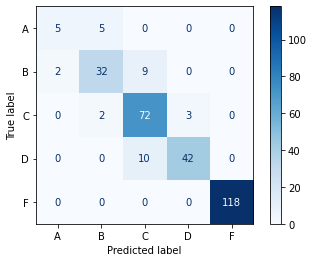

In [188]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (5,5))

plot_confusion_matrix(v, X_train, y_train,  cmap=plt.cm.Blues);

#### Test

In [191]:
all_x_data=pd.concat([X_train,X_val],axis=0,copy=True)
all_x_data.head()

,math score,reading score,writing score,TotalMarks,Percentage,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,test preparation course_completed,test preparation course_none,OverAll_F,OverAll_P,math_status_F,math_status_P,read_stat_F,read_stat_P,write_stat_F,write_stat_P
521,91,86,84,261,87.000000,1,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
737,53,66,73,192,64.000000,1,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
740,80,73,72,225,75.000000,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,1
660,74,77,73,224,74.666667,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
411,84,83,78,245,81.666667,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1


In [192]:
all_y_data=pd.concat([y_train,y_val],axis=0,copy=True)
all_y_data.head()

521    B
737    F
740    C
660    C
411    B
Name: Grade, dtype: object

In [206]:
log_reg=LogisticRegression(C=10,max_iter=1000,solver='lbfgs')
log_reg.fit(all_x_data,all_y_data)
y_pred=log_reg.predict(X_test)

print_all_metrics(y_test,y_pred)

Accuracy:		0.8514285714285714
F1 Score:		0.8428027280781308
Recall :		0.8514285714285714
Precision :		0.8399526792015325


C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Summary of the results :

- Finally, I noticed throughout the analysis that around 15-20% of students do not pass the exam, regardless of their parent's level of education, and I apply Logistic Regression for classifying grades for students with an accuracy of 85%.